# Absenteesim Data

### Context
Absenteeism- is a major expense to most organizations. Getting a handle on it, predicting it and affecting it is important for organizations.

### Content
Data includes- 
* **ID** - Employee ID
* **Reason for Absence** - List of reasons for being absent (0-28)
* **Date** - Date on which employee is absent
* **Transportation Expense** - Cost of coming from home to workplace and back
* **Distance to Work** - Distance from home to workplace in KM
* **Age** - Employee Age
* **Daily Work Load Average** - Average number of hours worked by an employee in a day
* **Body Mass Index** - BMI of employee
* **Education** - 1(12th pass), 2(Graduate), 3(Major Degree), 4( PHD)
* **Children** - Number of children of an employee
* **Pets** - Number of pets of an employee
* **Absenteeism Time in Hours** - Number of hours given employee is absent

# Creater - Rohan Kumar

In [1]:
# importing all necessary libraries

# Regular EDA (Explanatory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# we want our plots to be appear in notebook
%matplotlib inline

# Different Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Different metrics for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

## Exploring Data

In [2]:
# importing the csv file
raw_data = pd.read_csv('Absenteeism_data.csv')

In [3]:
# viewing first 5 entries from the data
raw_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [4]:
# some basic statistics
raw_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,700.0,NaN,NaN,NaN,17.951429,11.028144,1.0,9.0,18.0,28.0,36.0
Reason for Absence,700.0,NaN,NaN,NaN,19.411429,8.356292,0.0,13.0,23.0,27.0,28.0
Date,700,432,10/08/2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transportation Expense,700.0,NaN,NaN,NaN,222.347143,66.31296,118.0,179.0,225.0,260.0,388.0
Distance to Work,700.0,NaN,NaN,NaN,29.892857,14.804446,5.0,16.0,26.0,50.0,52.0
Age,700.0,NaN,NaN,NaN,36.417143,6.379083,27.0,31.0,37.0,40.0,58.0
Daily Work Load Average,700.0,NaN,NaN,NaN,271.801774,40.021804,205.917,241.476,264.249,294.217,378.884
Body Mass Index,700.0,NaN,NaN,NaN,26.737143,4.254701,19.0,24.0,25.0,31.0,38.0
Education,700.0,NaN,NaN,NaN,1.282857,0.66809,1.0,1.0,1.0,1.0,4.0
Children,700.0,NaN,NaN,NaN,1.021429,1.112215,0.0,0.0,1.0,2.0,4.0


In [5]:
# checking datatypes of columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


**No Null values in the data**

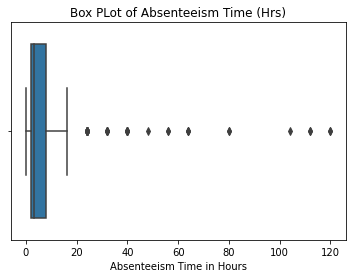

In [6]:
sns.boxplot(x = 'Absenteeism Time in Hours', data = raw_data)
plt.title('Box PLot of Absenteeism Time (Hrs)')
plt.show()

**Clearly, Absenteism Time (Hrs) has some outliers.**

But we can't ignore them as there can be some serious reason for being absent for 120 Hrs(5 days).

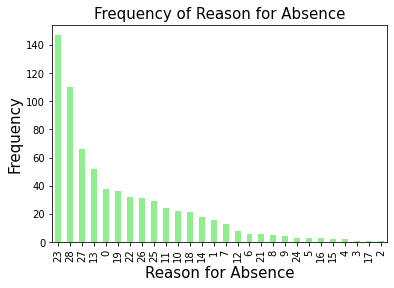

In [7]:
raw_data['Reason for Absence'].value_counts().plot(kind='bar', color='lightgreen');
plt.title('Frequency of Reason for Absence', fontsize=15)
plt.xlabel('Reason for Absence', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

**Clearly, `Reason 23` is the most occuring reason for the absence of an employee**

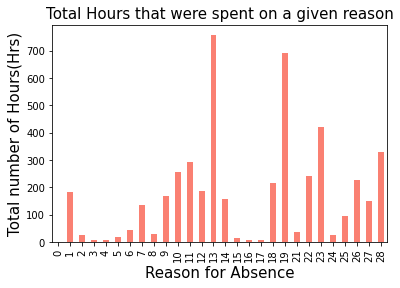

In [8]:
raw_data.groupby('Reason for Absence').sum()['Absenteeism Time in Hours'].plot(kind='bar', color='salmon');
plt.title('Total Hours that were spent on a given reason', fontsize=15)
plt.xlabel('Reason for Absence', fontsize=15)
plt.ylabel('Total number of Hours(Hrs)', fontsize=15)
plt.show()

**Clearly, `Reason 13` has the most number of hours on Absenteesim.**

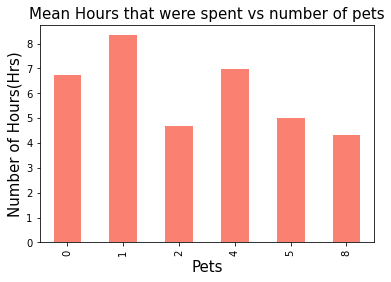

In [9]:
raw_data.groupby('Pets').mean()['Absenteeism Time in Hours'].plot(kind='bar', color='salmon');
plt.title('Mean Hours that were spent vs number of pets', fontsize=15)
plt.xlabel('Pets', fontsize=15)
plt.ylabel('Number of Hours(Hrs)', fontsize=15)
plt.show()

# Converting features into more interpretable form

In [10]:
# making copy of the 'raw_data' dataframe (checkpoint)
data = raw_data.copy()

# drop ID-column as Absenteeism Hours has no dependence on it 
data = data.drop(columns=['ID'])

### Merging Reason for Absence into 4 gropus
* `reason_1` - all reasons from 0 to 14
* `reason_2` - all reasons from 15 to 17
* `reason_3` - all reasons from 18 to 21
* `reason_4` - all reasons from 22 to 28

In [11]:
# creating dummies column
dummies_column = pd.get_dummies(data['Reason for Absence'])
dummies_column

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# creating groups
data['reason_1'] = dummies_column.iloc[:,0:15].max(axis=1)
data['reason_2'] = dummies_column.iloc[:,15:18].max(axis=1)
data['reason_3'] = dummies_column.iloc[:,18:22].max(axis=1)
data['reason_4'] = dummies_column.iloc[:,22:].max(axis=1)

In [13]:
# dropping Reason for Absence column
data = data.drop(columns = ['Reason for Absence'])

In [14]:
# rearranging columns of data
data = data[[ 'reason_1', 'reason_2', 'reason_3',
       'reason_4', 'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children','Pets', 'Absenteeism Time in Hours',]]

In [15]:
# now our dataset looks like
data.head()

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,1,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Converting datatype of `Date` column

In [16]:
# again make a copy of 'data' dataframe (cheackpoint)
data_date = data.copy()

In [17]:
data_date['Date'] = pd.to_datetime(data_date['Date'], format='%d/%m/%Y')

In [18]:
data_date['Date'].dtype

dtype('<M8[ns]')

In [19]:
# creating a month column
data_date['month'] = data_date['Date'].dt.month

In [20]:
# creating a day column
data_date['day'] = data_date['Date'].dt.day

In [21]:
# again creating copy of 'data_date' dataframe
data2 = data_date.copy()

# drop Date column
data2 = data2.drop(columns = ['Date'])

In [22]:
# shuffling columns of 'final_data'
data2 = data2[['reason_1', 'reason_2', 'reason_3', 'reason_4','month', 'day','Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']]

In [23]:
data2.head(10)

,reason_1,reason_2,reason_3,reason_4,month,day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,7,289,36,33,239.554,30,1,2,1,4
1,1,0,0,0,7,14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,23,289,36,33,239.554,30,1,2,1,2
5,0,0,0,1,7,10,179,51,38,239.554,31,1,0,0,2
6,0,0,1,0,7,17,361,52,28,239.554,27,1,1,4,8
7,0,0,0,1,7,24,260,50,36,239.554,23,1,4,0,4
8,0,0,1,0,7,6,155,12,34,239.554,25,1,2,0,40
9,0,0,1,0,7,13,235,11,37,239.554,29,3,1,1,8


### Converting `Education` feature into
* 0 - if level of education is 1
* 1 - everything else, that is, level of education = 2, 3, 4 

In [24]:
# making checkpoint
data_edu = data2.copy()

In [25]:
# mapping required values 
data_edu['Education'] = data_edu['Education'].map({1:0,2:1,3:1,4:1})

In [26]:
data_edu['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

### Converting `Absenteeism Time in Hours` into binary formats
* 0 - whose Absenteeism Time in Hours are less than or equal to the median.
* 1 - whose Absenteeism Time in Hours are greater than median.

In [27]:
# ceating checkpoint
ab_data = data_edu.copy()

In [28]:
# checking median of Absenteeism Time in Hours column
ab_data['Absenteeism Time in Hours'].median()

3.0

In [29]:
# converting Absenteeism Time in Hours into binary format
ab_data['Absenteeism Time in Hours'] = np.where(ab_data['Absenteeism Time in Hours']>3,1,0)

# Now Modelling starts...

In [30]:
# creating checkpoint
final_data = ab_data.copy()

In [31]:
# lets look how our data looks like
final_data.head()

,reason_1,reason_2,reason_3,reason_4,month,day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,7,289,36,33,239.554,30,0,2,1,1
1,1,0,0,0,7,14,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,15,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,16,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,23,289,36,33,239.554,30,0,2,1,0


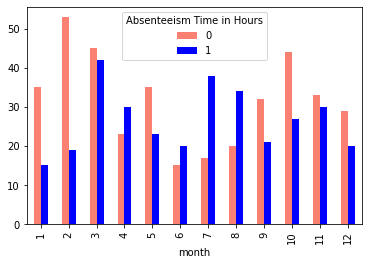

In [32]:
# One last EDA o check, which month has maximum number of Absenteeism greater than median
pd.crosstab(final_data['Absenteeism Time in Hours'], final_data['month']).T.plot(kind='bar', color=['salmon','blue']);

In [33]:
# creating target(y) and features(X)
y = final_data['Absenteeism Time in Hours']
X = final_data.drop(columns = ['Absenteeism Time in Hours'])

#### Scaling Data

In [34]:
# scaling our features(X)
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

#### Splitting Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=35)

## Baseline Models
* LogisticRegression()
* RandomForestClassifier()
* KNeighborsClassifier()

In [36]:
np.random.seed(35)

# creating dictionary of models
clfs = {'Logistic Regression' : LogisticRegression(),
        'Random Forest Classifier' : RandomForestClassifier(),
        'KNN' : KNeighborsClassifier()}

In [37]:
# creating score dataframe
score = {}
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    score[name] = clf.score(X_test, y_test)
score

{'Logistic Regression': 0.6785714285714286,
 'Random Forest Classifier': 0.7571428571428571,
 'KNN': 0.75}

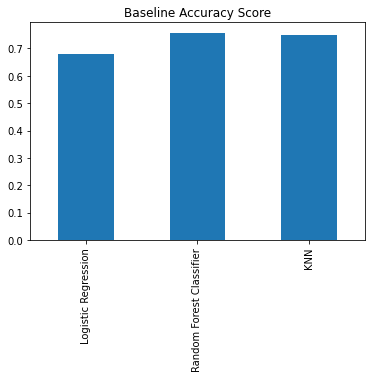

In [38]:
bs_score_df = pd.DataFrame(score, index=[0])
bs_score_df.T.plot(kind='bar', legend=False)
plt.title('Baseline Accuracy Score')
plt.show()

**Clearly, until now RandomForestClassifier has shown greater accuracy than others.**

# Hyperparameter Tuning
#### By RandomizedSearchCV

In [53]:
# Since Logistic Regression shows worst result, we will try to improvise it first.
rs_log_reg_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                   'C' : [100, 10, 1.0, 0.1, 0.01, 0.001]}

# initiating an instance of Logistic Regression
clf_log_reg = LogisticRegression(random_state=35)

# setup randomized search for logistic Regression
rs_log_reg = RandomizedSearchCV(estimator = clf_log_reg,
                                param_distributions=rs_log_reg_grid,
                                n_iter=15,
                                cv=5,
                                verbose=True)

In [54]:
# fitting training set
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=35),
                   n_iter=15,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   verbose=True)

In [55]:
# best parameters
rs_log_reg.best_params_

{'solver': 'lbfgs', 'C': 10}

In [131]:
rs_log_reg_score = rs_log_reg.score(X_test,y_test)
rs_log_reg_score

0.6785714285714286

**Clearly, after tuning too, LogisticRegression doesn't perform well. So we are gonna drop it.**

#### By GridSearchCV

In [68]:
# tuning KNN model
rs_knn_grid = {'n_neighbors' : np.arange(1,100,10),
               'leaf_size' : np.arange(10,1000,100)}

np.random.seed(35)
# initiating an instance of Logistic Regression
clf_knn = KNeighborsClassifier()

# setup randomized search for logistic Regression
rs_knn = GridSearchCV(estimator = clf_knn,
                     param_grid=rs_knn_grid,
                     cv=5,
                     verbose=True)

In [69]:
# fitting training dataset
rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910]),
                         'n_neighbors': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             verbose=True)

In [70]:
# finding best parameters
rs_knn.best_params_

{'leaf_size': 10, 'n_neighbors': 21}

In [133]:
rs_knn_score = rs_knn.score(X_test,y_test)
rs_knn_score

0.7642857142857142

In [74]:
# tuning RandomForestClassifier model
rs_rfc_grid = {'n_estimators' : np.arange(1,100,10),
               'max_depth' : [None, 5, 10, 20],
               'max_features' : ['sqrt', 'auto']}

np.random.seed(35)
# initiating an instance of Logistic Regression
clf_rfc = RandomForestClassifier()

# setup randomized search for logistic Regression
rs_rfc = GridSearchCV(estimator = clf_rfc,
                     param_grid=rs_rfc_grid,
                     cv=5,
                     verbose=True)

# fitting training set
rs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'auto'],
                         'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             verbose=True)

In [75]:
# best parameters
rs_rfc.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 31}

In [134]:
rs_rfc_score = rs_rfc.score(X_test, y_test)
rs_rfc_score

0.75

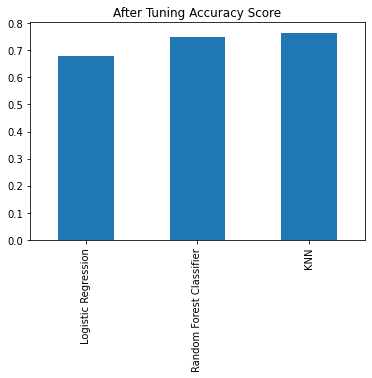

In [135]:
# combining results...(hpt - hyper parameter tuning)
hpt_score = {'Logistic Regression' : rs_log_reg_score,
             'Random Forest Classifier' : rs_rfc_score,
              'KNN' : rs_knn_score}

hpt_model_score_df = pd.DataFrame(hpt_score, index=[1])
hpt_model_score_df.T.plot(kind='bar', legend=False)
plt.title('After Tuning Accuracy Score')
plt.show()

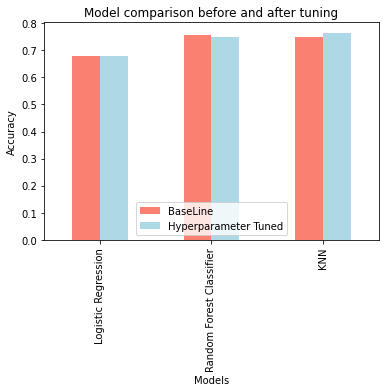

In [136]:
# compairing
compare_model = pd.concat([bs_score_df, hpt_model_score_df])
compare_model.T.plot(kind='bar', color=['salmon', 'lightblue'])
plt.legend(['BaseLine','Hyperparameter Tuned'])
plt.title('Model comparison before and after tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

**Clearly, using hyperparamterized KNN for prediction.**

# Prediction

In [137]:
# creating ideal absenteeism classifier(ab_clf)
ab_clf = KNeighborsClassifier(leaf_size=10,
                                n_neighbors= 21)

# fitting data
ab_clf.fit(X_train, y_train)

# prediction
y_preds = ab_clf.predict(X_test)

# Evaluating models on different metrics
* ROC and AUC
* Confusion Matrix
* Classification Report
* Precision score
* Recall score
* f1 score

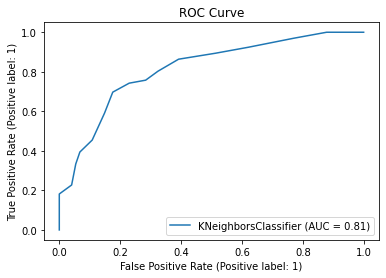

In [138]:
# plotting ROC curve and finding AUC
plot_roc_curve(ab_clf, X_test, y_test)
plt.title('ROC Curve')
plt.show()

In [139]:
# finding confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[61, 13],
       [20, 46]], dtype=int64)

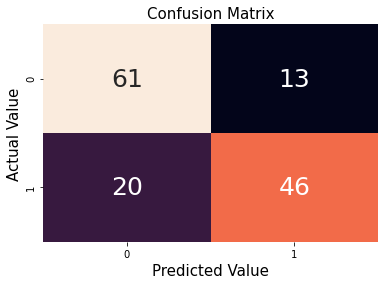

In [140]:
# plotting stylish confusiion matrix
sns.heatmap(conf_mat,
            annot=True,
            cbar=False,
            annot_kws={'size': 25})
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Value', fontsize=15)
plt.ylabel('Actual Value', fontsize=15)
plt.show()

In [141]:
# printing classification reports
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        74
           1       0.78      0.70      0.74        66

    accuracy                           0.76       140
   macro avg       0.77      0.76      0.76       140
weighted avg       0.77      0.76      0.76       140



### Using `cross_val_score` to find rest scores

In [142]:
# creating an instance for cross validation
knn_clf = KNeighborsClassifier(leaf_size=10,
                                n_neighbors= 21)

In [147]:
# Accuracy Score
cv_acc = cross_val_score(knn_clf, X_train, y_train, scoring='accuracy', cv=10)
cv_acc

array([0.64285714, 0.67857143, 0.66071429, 0.73214286, 0.66071429,
       0.80357143, 0.66071429, 0.69642857, 0.76785714, 0.82142857])

In [163]:
acc_score = np.mean(cv_acc)
acc_score

0.7125000000000001

In [149]:
# Precision Score
cv_ps = cross_val_score(knn_clf, X_train, y_train, scoring='precision', cv=10)
cv_ps

array([0.61538462, 0.75      , 0.66666667, 0.70833333, 0.65      ,
       0.75      , 0.6875    , 0.64285714, 0.75      , 0.82608696])

In [164]:
pre_score = np.mean(cv_ps)
pre_score

0.7046828714763497

In [154]:
# Recall Score
rec_ps = cross_val_score(knn_clf, X_train, y_train, scoring='recall', cv=10)
rec_ps

array([0.61538462, 0.46153846, 0.53846154, 0.68      , 0.52      ,
       0.84      , 0.44      , 0.72      , 0.72      , 0.76      ])

In [161]:
rec_score = np.mean(rec_ps)
rec_score

0.6295384615384615

In [157]:
# f1 Score
f1_ps = cross_val_score(knn_clf, X_train, y_train, scoring='f1', cv=10)
f1_ps

array([0.61538462, 0.57142857, 0.59574468, 0.69387755, 0.57777778,
       0.79245283, 0.53658537, 0.67924528, 0.73469388, 0.79166667])

In [160]:
f1_score = np.mean(f1_ps)
f1_score

0.6588857219741329

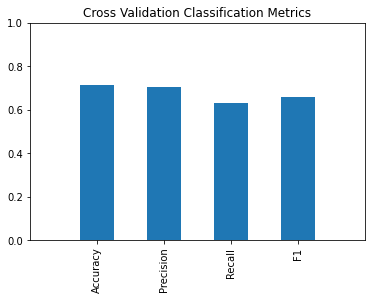

In [173]:
# Visualize these metrics
metrics_df = pd.DataFrame({'Accuracy' : acc_score,
                           'Precision' : pre_score,
                           'Recall' : rec_score,
                           'F1' : f1_score},
                           index=[0])
metrics_df.T.plot(kind='bar', title='Cross Validation Classification Metrics', legend=False)
plt.axis([-1,4,0,1])
plt.show()